<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week7_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 3I_2341729016_3 - Fitri yanti.jpg to 3I_2341729016_3 - Fitri yanti (78).jpg


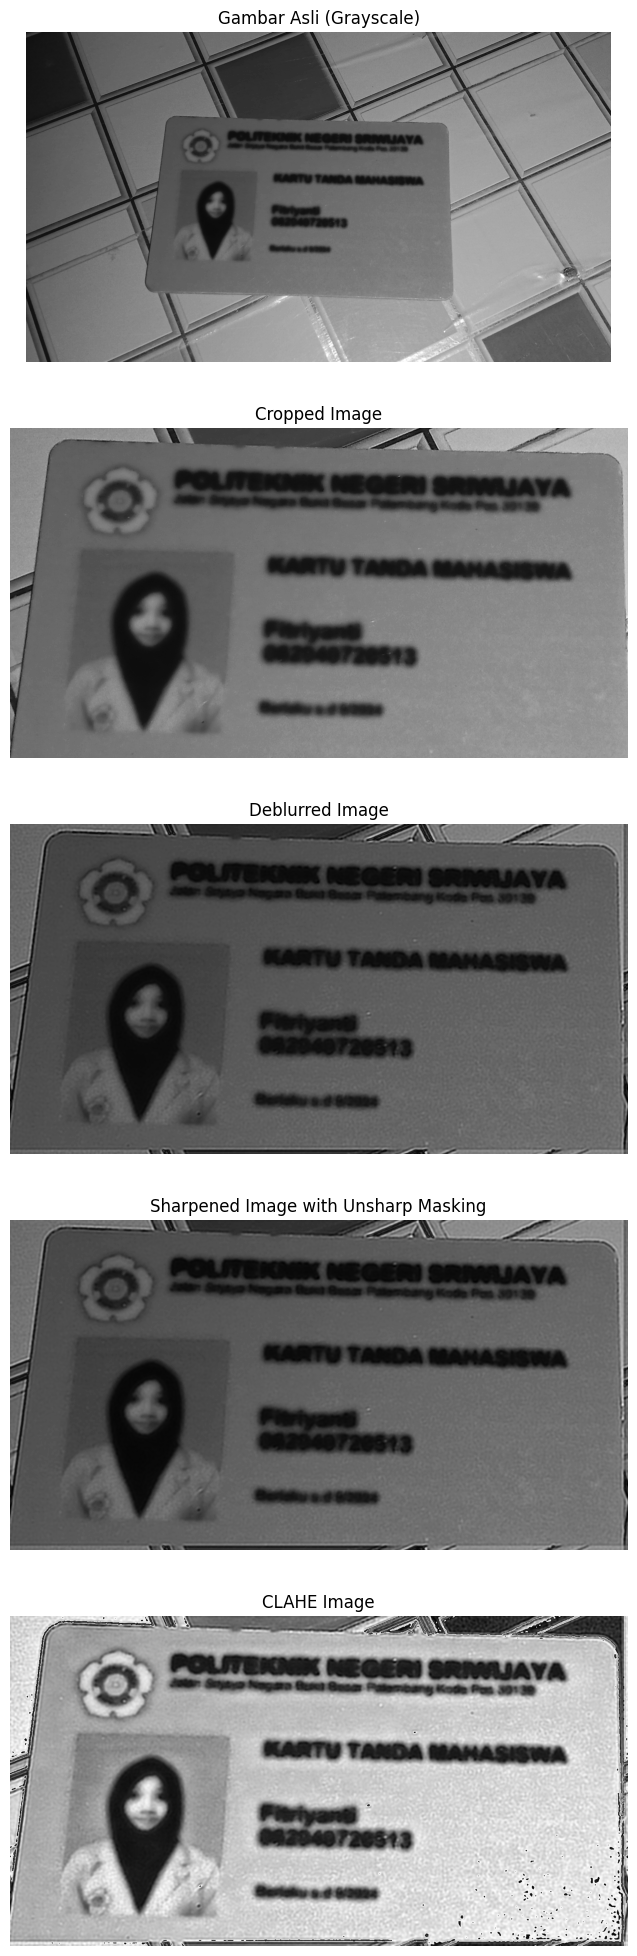

In [83]:
from google.colab import files
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#  Wiener filter
def wiener_filter(img, kernel, K):
    # Transformasi Fourier dari gambar
    img_fft = np.fft.fft2(img)

    # Transformasi Fourier dari kernel, pastikan ukuran kernel sama dengan gambar
    kernel_fft = np.fft.fft2(kernel, s=img.shape)

    # Menghindari pembagian dengan nol pada penyebut
    kernel_fft_conj = np.conj(kernel_fft)
    denominator = kernel_fft * kernel_fft_conj + K

    # Menerapkan filter Wiener
    deblurred_fft = img_fft * kernel_fft_conj / denominator
    deblurred_img = np.abs(np.fft.ifft2(deblurred_fft))

    return deblurred_img

# Gaussian kernel yang digunakan dalam filter
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

#  Kernel sharpening
def sharpen_image(image):
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    sharpened_image = cv.filter2D(image, -1, sharpening_kernel)
    return sharpened_image

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(img):
    clahe = cv.createCLAHE(clipLimit=0.8, tileGridSize=(32, 32))
    return clahe.apply(np.uint8(img))

# Crop gambar
def crop_image(image, x, y, width, height):
    return image[y:y+height, x:x+width]

# Upload gambar
uploaded = files.upload()

# Membaca nama file yang diunggah
filename = list(uploaded.keys())[0]

blurred_image = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Koordinat
x = 570
y = 370
width = 1440
height = 770

# Memotong gambar
cropped_image = crop_image(blurred_image, x, y, width, height)

# Ukuran kernel Gaussian
kernel_size = 21
sigma = 3
gaussian_kernel = gaussian_kernel(kernel_size, sigma)

# Menerapkan Wiener filter dengan kernel Gaussian pada gambar yang dipotong
K = 0.025
deblurred_image = wiener_filter(cropped_image, gaussian_kernel, K)

# Unsharp Masking
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred_for_mask = cv.GaussianBlur(image, (0, 0), sigma)
    mask = cv.subtract(image, blurred_for_mask)
    sharpened_image = cv.addWeighted(image, 1.0 + strength, mask, -strength, 0)
    return sharpened_image
final_sharpened_image = unsharp_mask(deblurred_image, sigma=1.5, strength=1.0)

# Menerapkan CLAHE
clahe_image = apply_clahe(final_sharpened_image)

plt.figure(figsize=(50, 30))

plt.subplot(6, 1, 1)
plt.title('Gambar Asli (Grayscale)')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(6, 1, 2)
plt.title('Cropped Image :')
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')

plt.subplot(6, 1, 3)
plt.title('Deblurred Image :')
plt.imshow(deblurred_image, cmap='gray')
plt.axis('off')

plt.subplot(6, 1, 4)
plt.title('Sharpened Image :')
plt.imshow(final_sharpened_image, cmap='gray')
plt.axis('off')

plt.subplot(6, 1, 5)
plt.title('CLAHE Image :')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.show()
